In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sb
import networkx as nx
import random
import os
import sys
import subprocess
import re

In [2]:
def writeGraph(grafo,file_output):
    with open(file_output, 'w') as f:
        f.write(str(len(grafo))+'\n')
        f.write(str(grafo.number_of_edges())+'\n')
        for eje in list(grafo.edges):
            f.write(str(eje[0]+1)+' '+str(eje[1]+1)+'\n')



In [25]:
def readGraph(file_input):
    grafo = {}
    ejes = []
    with open(file_input, 'r') as f:
        grafo["nodos"] = int(f.readline())
        grafo["aristas"]=int(f.readline())
        for e in f:
            ejes.append((int(e.split(' ')[0]),int(e.split(' ')[1])))
        grafo["ejes"] = ejes
    return grafo        

In [22]:
al = {}
al["ja"]=45
al

{'ja': 45}

In [12]:
nodos = range(1,11)
data = [(1,2),(2,1),(2,3),(3,2),(3,4),(4,3),(4,5),(5,4),(5,6),(6,5),(6,7),(7,6),(7,8),(8,7),(8,1),(1,8),(1,10),(2,10),
       (3,10),(4,10),(5,10),(6,10),(7,10),(8,10),(10,9)]
G = nx.DiGraph()
G.add_nodes_from(nodos)
G.add_edges_from(data)
G.edges()

OutEdgeView([(1, 2), (1, 8), (1, 10), (2, 1), (2, 3), (2, 10), (3, 2), (3, 4), (3, 10), (4, 3), (4, 5), (4, 10), (5, 4), (5, 6), (5, 10), (6, 5), (6, 7), (6, 10), (7, 6), (7, 8), (7, 10), (8, 7), (8, 1), (8, 10), (10, 9)])

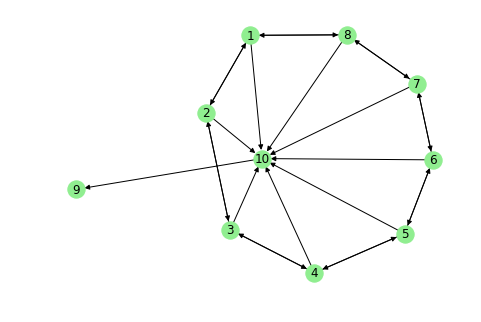

In [23]:
nx.draw(G, with_labels=True,node_color ='lightgreen')
plt.savefig("prueba_circular" + "."+ ".png", transparent = True)
plt.draw()

In [32]:
grafo2_dict = readGraph("cualitativos/test_2.txt")
nodos = range(1,grafo2_dict["nodos"]+1)
list(nodos)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [44]:
grafo2_dict = readGraph("cualitativos/test_1.txt")
nodos = range(1,grafo2_dict["nodos"]+1)
data = grafo2_dict["ejes"]
grafo_2 = nx.DiGraph()
grafo_2.add_nodes_from(nodos)
grafo_2.add_edges_from(data)
grafo_2.edges()


OutEdgeView([(1, 2), (2, 1), (3, 1), (4, 1), (4, 3), (5, 1), (5, 3), (6, 1), (6, 3), (7, 1), (7, 3), (8, 1), (8, 3)])

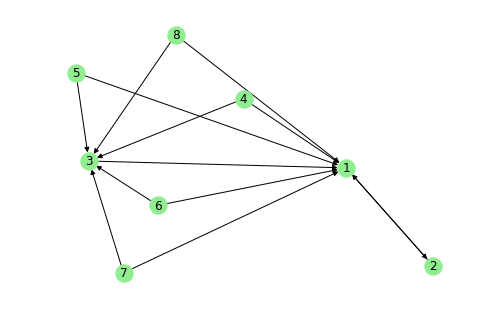

In [58]:
nx.draw(grafo_2, layout = nx.circular_layout(grafo_2), with_labels=True,node_color ='lightgreen')
plt.savefig("prueba_grafo_2" + "."+ ".png", transparent = True)
plt.draw()

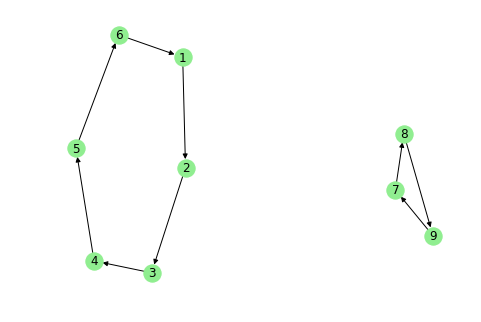

In [50]:
grafo_dict_3 = readGraph("cualitativos/test_3.txt")
nodos = range(1,grafo_dict_3["nodos"]+1)
list(nodos)
grafo_dict_3 = readGraph("cualitativos/test_3.txt")
nodos = range(1,grafo_dict_3["nodos"]+1)
data = grafo_dict_3["ejes"]
grafo_3 = nx.DiGraph()
grafo_3.add_nodes_from(nodos)
grafo_3.add_edges_from(data)
grafo_3.edges()
nx.draw(grafo_3, layout = nx.circular_layout(grafo_3), with_labels=True,node_color ='lightgreen')
plt.savefig("prueba_3_no_conexa" + "."+ ".png", transparent = True)
plt.show()
